[1] "Ecstroma"   "OstromaB"   "Ostroma"    "endothelia" "pericyte"  
 [6] "LEC"        "macrophage" "T"          "B"          "mast"

Rename cell groups but do not change the order! 



The cell group order before renaming is  Ecstroma OstromaB Ostroma endothelia pericyte LEC macrophage T B mast 
The cell group order after renaming is  EnS OSCb OSCa Endothelia Pericyte LEC Macrophage T B Mast 


We now re-run computeCommunProbPathway`,`aggregateNet`, and `netAnalysis_computeCentrality`...



[1] "Stroma"     "Endothelia" "Pericyte"   "macrophage" "T/NK"      
[6] "mast"

Rename cell groups but do not change the order! 



The cell group order before renaming is  Stroma Endothelia Pericyte macrophage T/NK mast 
The cell group order after renaming is  OSC Endothelia Pericyte Macrophage T Mast 


We now re-run computeCommunProbPathway`,`aggregateNet`, and `netAnalysis_computeCentrality`...



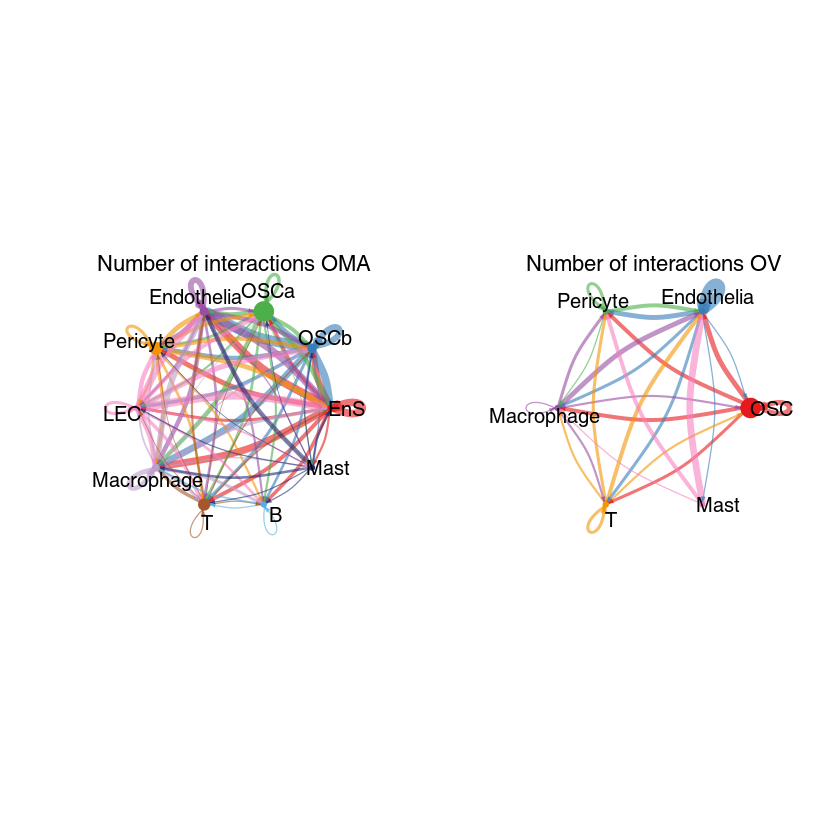

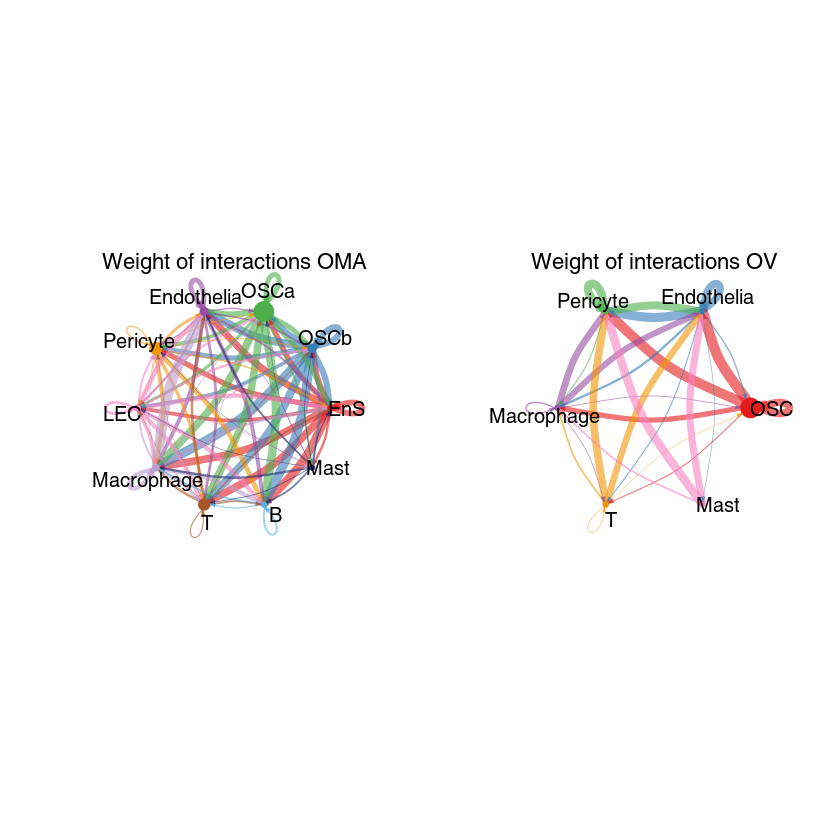

In [4]:
library(CellChat)
library(ggplot2)
library(patchwork)
library(igraph)
library(Seurat)
library(tidyverse)
library(ComplexHeatmap)

cellchatOMA<-readRDS("/home/liusong/scRNA/endometriosis/V2data/scanpy/21samples/cellchat/cellchat_myOMA_LS.rds")
levels(cellchatOMA@idents)
cellchatOMA <- updateClusterLabels(cellchatOMA, new.cluster.name = c("EnS","OSCb", "OSCa","Endothelia", "Pericyte", "LEC","Macrophage", "T","B","Mast"))

cellchatOV<-readRDS(file="/home/liusong/scRNA/endometriosis/V3data/Downloaded_Ovary_Control/ScienceAdvances_GSE260685/seurat/cellchat/OVdata_cellchat.rds")
levels(cellchatOV@idents)
cellchatOV<-updateClusterLabels(cellchatOV,new.cluster.name=c("OSC","Endothelia","Pericyte","Macrophage","T","Mast"))

groupSize1 <- as.numeric(table(cellchatOMA@idents))
groupSize2 <- as.numeric(table(cellchatOV@idents))
par(mfrow = c(1,2), xpd=TRUE)
pcOMAn<-netVisual_circle(cellchatOMA@net$count, title.name = "Number of interactions OMA",vertex.weight = groupSize1, weight.scale = T, label.edge= F)
pcOVn<-netVisual_circle(cellchatOV@net$count,vertex.weight = groupSize2, weight.scale = T, label.edge= F, title.name = "Number of interactions OV")
par(mfrow = c(1,2), xpd=TRUE)
pcOMAw<-netVisual_circle(cellchatOMA@net$weight, title.name = "Weight of interactions OMA",vertex.weight = groupSize1, weight.scale = T, label.edge= F,edge.width.max = 3)
pcOVw<-netVisual_circle(cellchatOV@net$weight,vertex.weight = groupSize2, weight.scale = T, label.edge= F, title.name = "Weight of interactions OV",edge.width.max = 3)

In [5]:
group.new=c("EnS","OSCb", "OSCa","OSC","Endothelia", "Pericyte", "LEC","Macrophage", "T","B","Mast")
cellchatOV<-liftCellChat(cellchatOV,group.new)
cellchatOMA<-liftCellChat(cellchatOMA,group.new)

cc_list<-list(OV=cellchatOV,OMA=cellchatOMA)
group_names<-names(cc_list)
cc<-mergeCellChat(cc_list,add.names=names(cc_list),cell.prefix=TRUE)
com_pathways <- purrr::map(cc_list, ~ .x@netP$pathways) %>%reduce(intersect) %>%  unique()  #jiao ji
pathway_union <- purrr::map(cc_list, ~ .x@netP$pathways) %>%reduce(union) %>% unique() 

The CellChat object will be lifted up using the cell labels EnS, OSCb, OSCa, OSC, Endothelia, Pericyte, LEC, Macrophage, T, B, Mast



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels EnS, OSCb, OSCa, OSC, Endothelia, Pericyte, LEC, Macrophage, T, B, Mast



Update slots object@net, object@netP, object@idents in a single dataset... 
The cell barcodes in merged 'meta' is  Donor1_AAACCCAAGAGTACCG-1 Donor1_AAACCCACAAACTCGT-1 Donor1_AAACCCACAACCACAT-1 Donor1_AAACCCACACAAGGTG-1 Donor1_AAACCCACACACGGAA-1 Donor1_AAACCCACATCGAGCC-1 


Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



Do heatmap based on a merged object 


Do heatmap based on a merged object 


ERROR while rich displaying an object: Error in grid.Call.graphics(C_downvppath, name$path, name$name, strict): Viewport 'Relative values_heatmap_body_1_1' was not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .

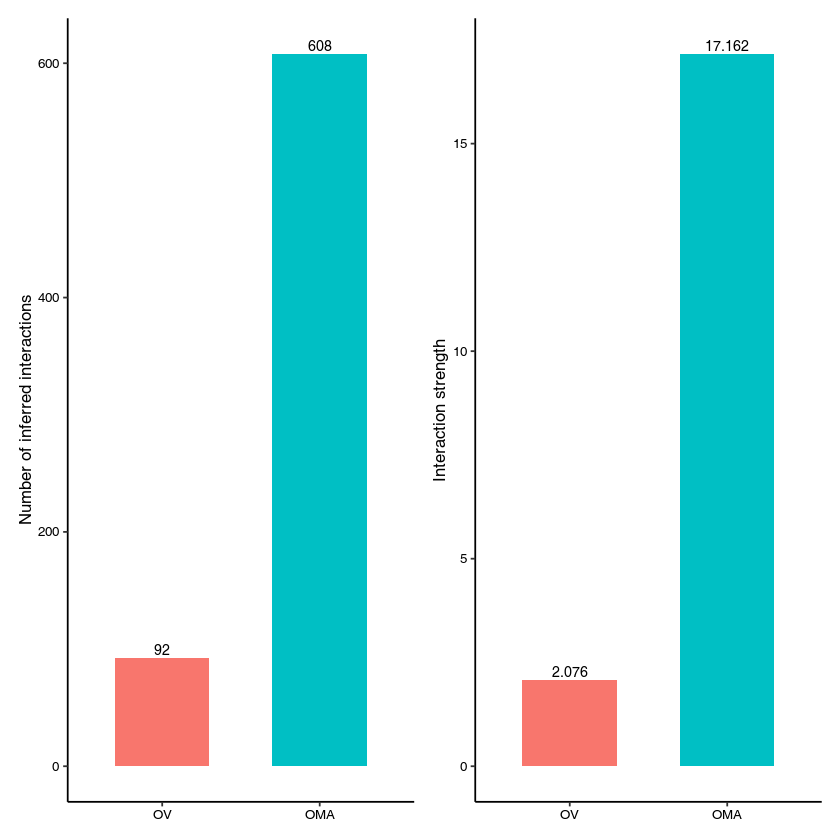

In [22]:
###barplot of interaction count/weight#
pb1 <- compareInteractions(cc, show.legend = FALSE, group = c(1, 2))
pb2 <- compareInteractions(cc, show.legend = FALSE, group = c(1, 2), measure = "weight")
pb1+pb2

###heatmap of interaction count/weight
ph1 <- netVisual_heatmap(cc, measure = "count")
ph2 <- netVisual_heatmap(cc, measure = "weight")
ph1+ph2

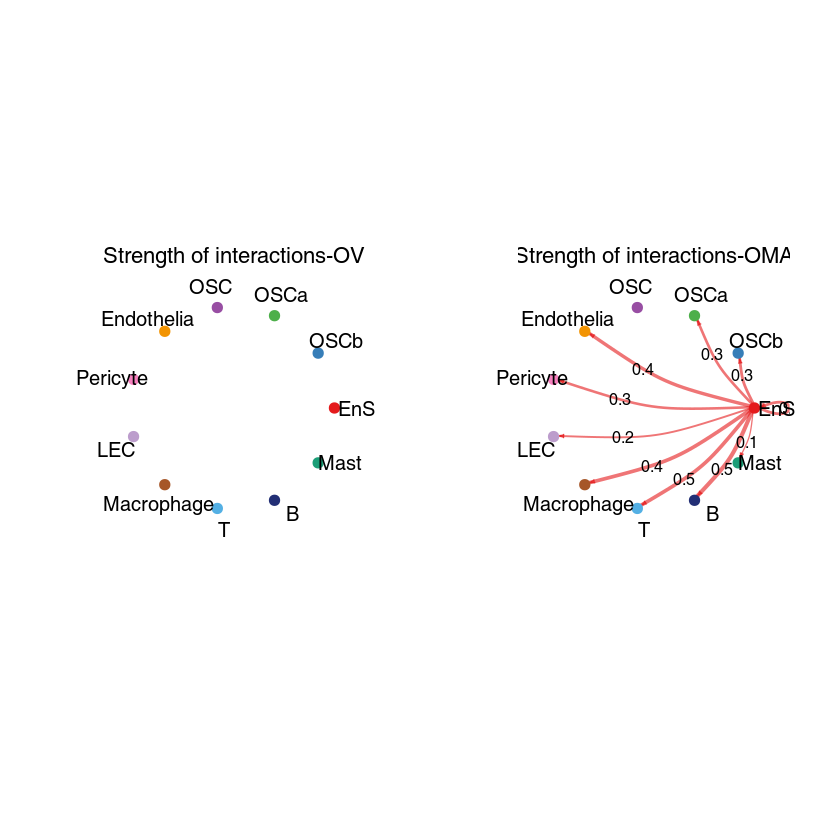

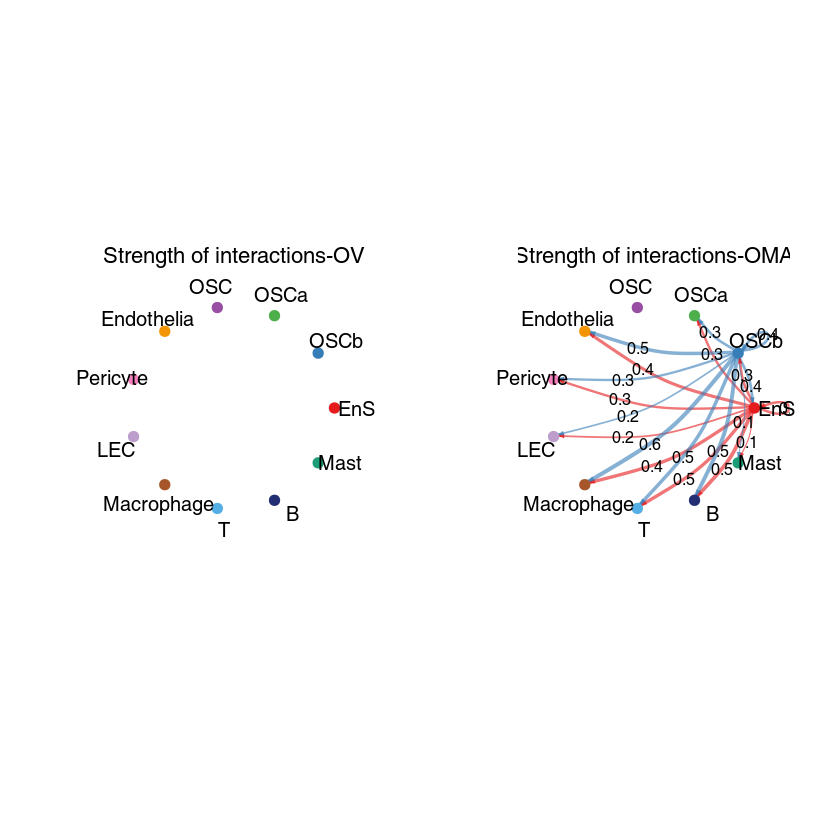

In [14]:
##net plot for specific cells for recieved or send signaling
par(mfrow = c(1, 2))
send_cell <- c("EnS","OSCb","OSCa","OSC")
receive_cell <- c("Macrophage","T","B","Mast")
mymat<-matrix(0,nrow=nrow(cc_list[[1]]@net$weight),ncol=ncol(cc_list[[1]]@net$weight),dimnames = dimnames(cc_list[[1]]@net$weight))
mat1<-mymat 
mat2<-mymat
for (mycell in send_cell){
	mat1[mycell,] <- cc_list[[1]]@net$weight[mycell,] #mat1[send_cell,] <- cc_list[[1]]@net$weight[send_cell,]
	mat2[mycell,] <- cc_list[[2]]@net$weight[mycell,] #mat2[send_cell,] <- cc_list[[2]]@net$weight[send_cell,]
	weight.max <- max(max(mat1), max(mat2)) 
 	netVisual_circle(mat1,weight.scale = T, label.edge = T, edge.weight.max = weight.max, edge.width.max = 3,title.name = paste0("Strength of interactions-", names(cc_list)[1]))
	netVisual_circle(mat2,weight.scale = T, label.edge = T, edge.weight.max = weight.max, edge.width.max = 3,title.name = paste0("Strength of interactions-", names(cc_list)[2])) 
}



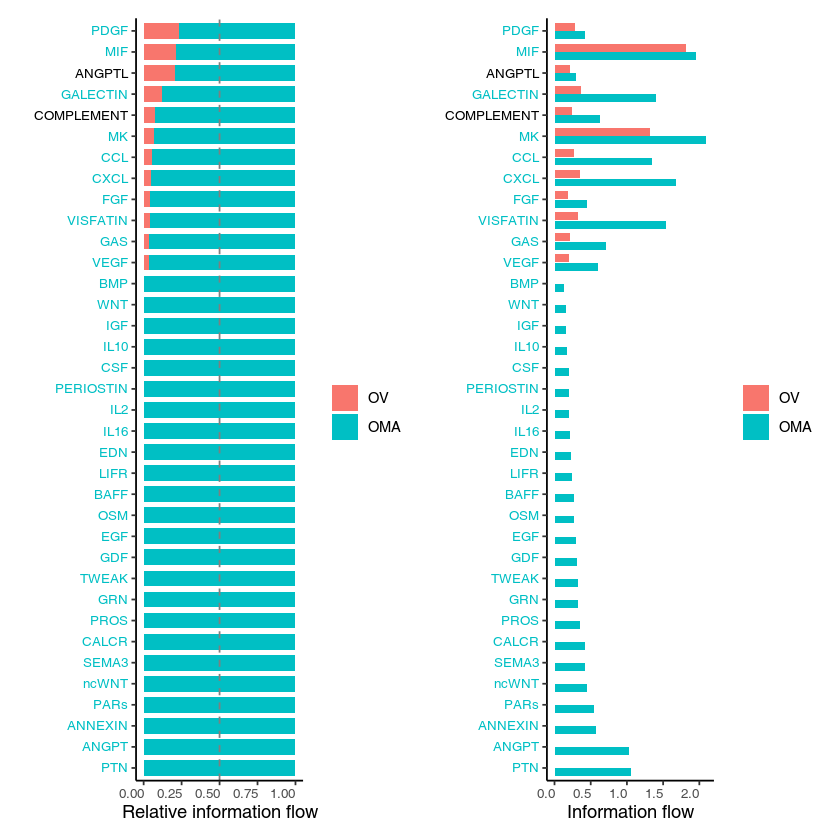

In [23]:
#pathway signaling compare barplot
ps1 <- rankNet(cc, mode = "comparison", stacked = TRUE, do.stat = TRUE)
ps2 <- rankNet(cc, mode = "comparison", stacked = FALSE, do.stat = TRUE)
ps1+ps2



In [24]:
#signaling compare heatmap
for (x in c("all","outgoing","incoming")) {
	pl <- map(seq(length(cc_list)), ~ netAnalysis_signalingRole_heatmap(cc_list[[.x]], title = group_names[.x], pattern = x, signaling = pathway_union, width = 9, height = 12))
	p <- reduce(pl, `+`)
	plot(p)
}




ERROR: Error in grid.Call.graphics(C_downvppath, name$path, name$name, strict): Viewport 'Relative strength_heatmap_body_1_1' was not found


Visualizing differential outgoing and incoming signaling changes from OV to OMA

The following `from` values were not present in `x`: 0

The following `from` values were not present in `x`: 0, -1

Visualizing differential outgoing and incoming signaling changes from OV to OMA

The following `from` values were not present in `x`: 0

The following `from` values were not present in `x`: 0, -1

Visualizing differential outgoing and incoming signaling changes from OV to OMA

The following `from` values were not present in `x`: 0

The following `from` values were not present in `x`: 0, -1



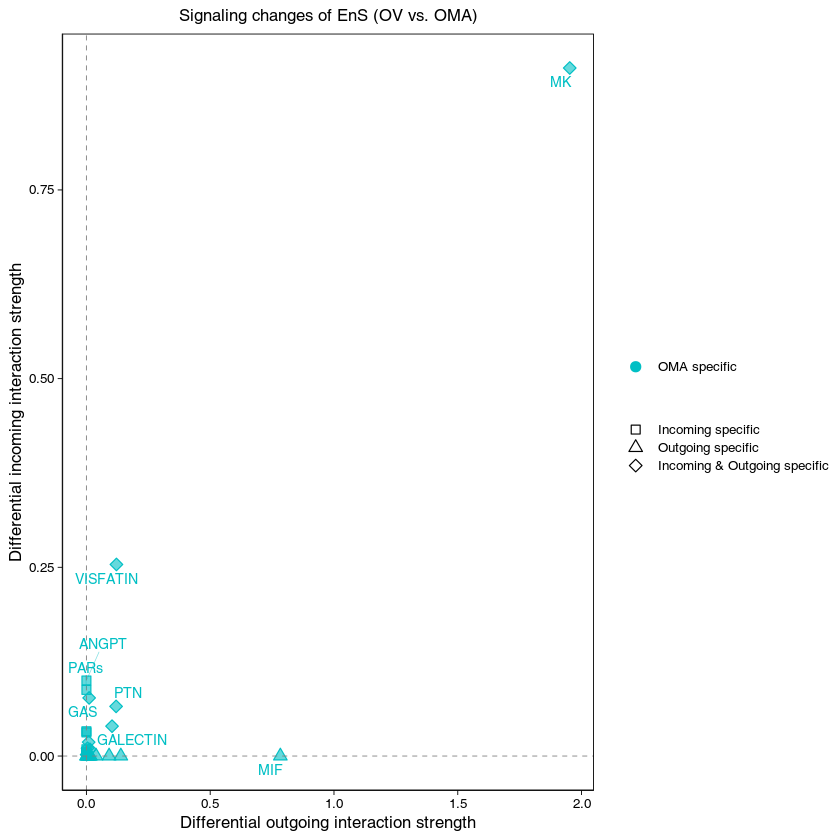

Visualizing differential outgoing and incoming signaling changes from OV to OMA

The following `from` values were not present in `x`: 0

The following `from` values were not present in `x`: 0, 1



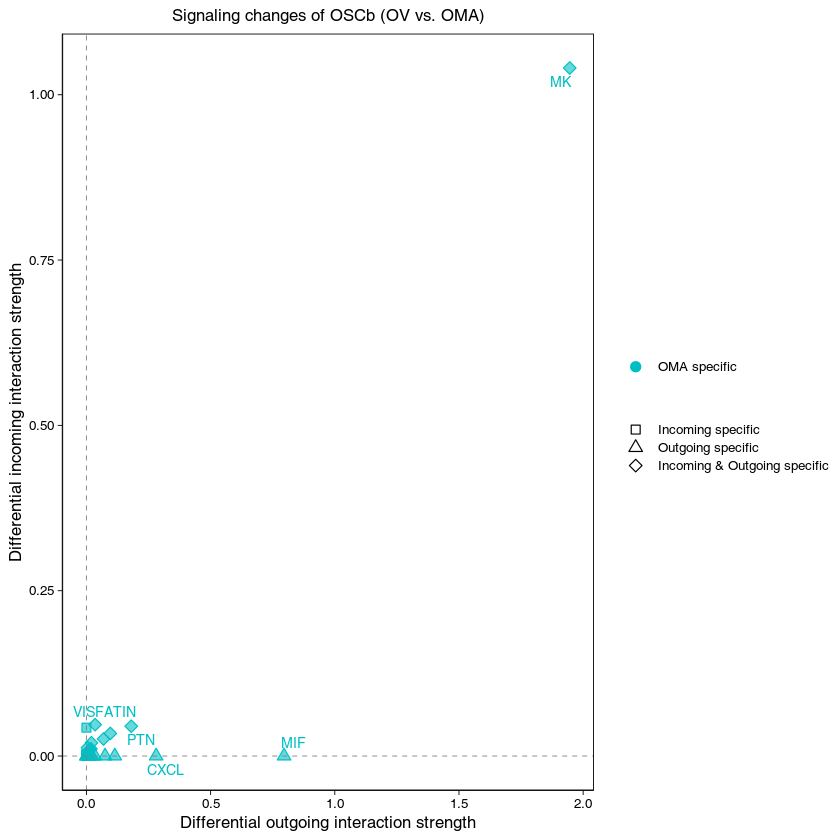

Visualizing differential outgoing and incoming signaling changes from OV to OMA



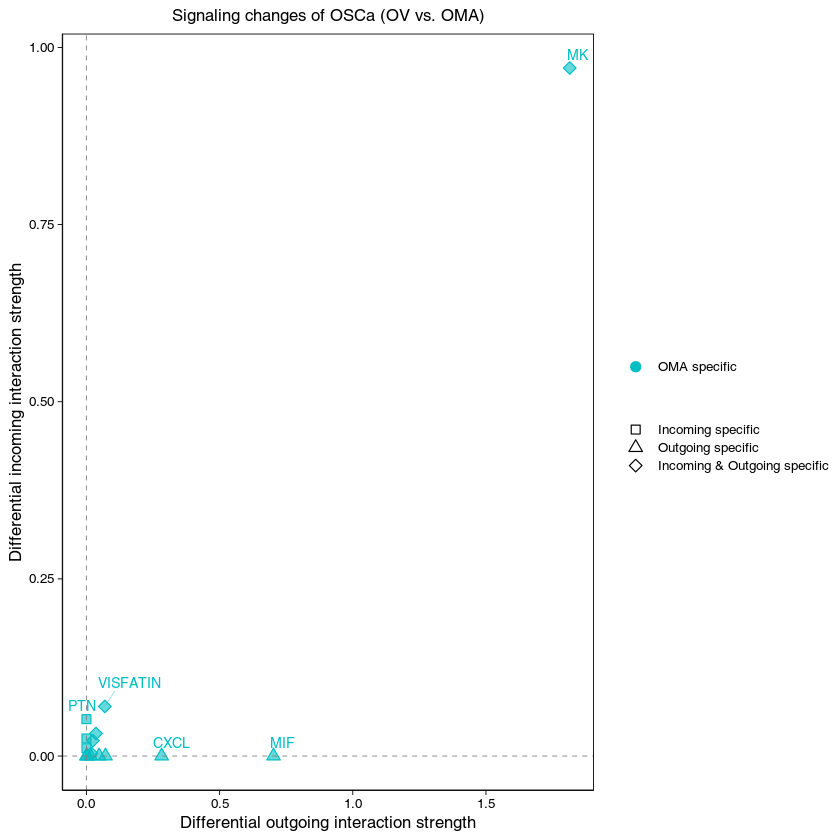

Visualizing differential outgoing and incoming signaling changes from OV to OMA

The following `from` values were not present in `x`: -1



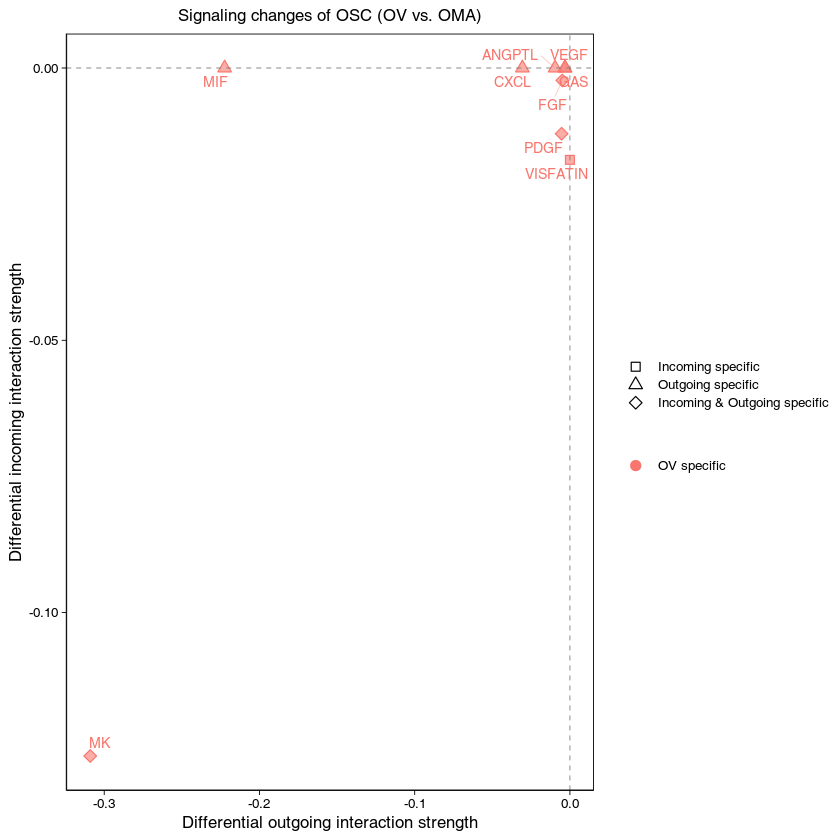

Visualizing differential outgoing and incoming signaling changes from OV to OMA

The following `from` values were not present in `x`: 0

The following `from` values were not present in `x`: 0, -1



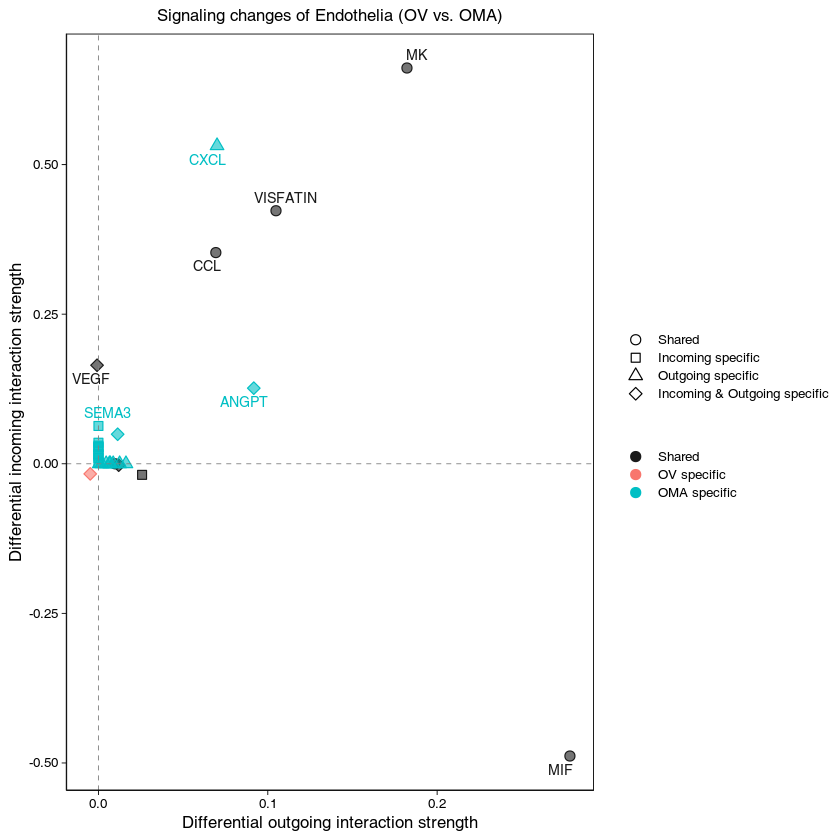

Visualizing differential outgoing and incoming signaling changes from OV to OMA



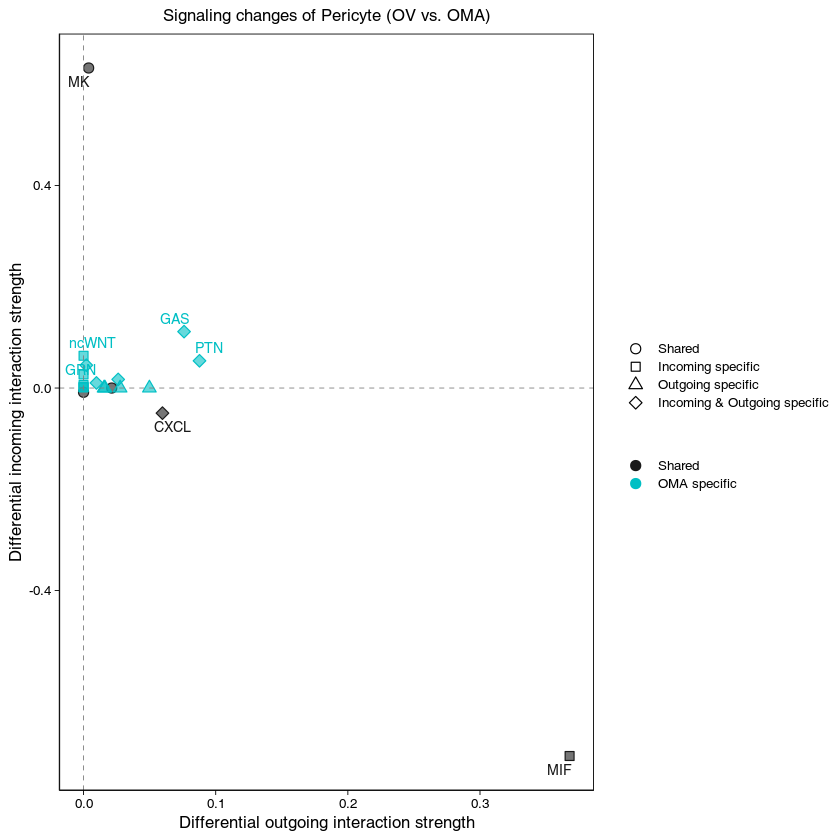

Visualizing differential outgoing and incoming signaling changes from OV to OMA



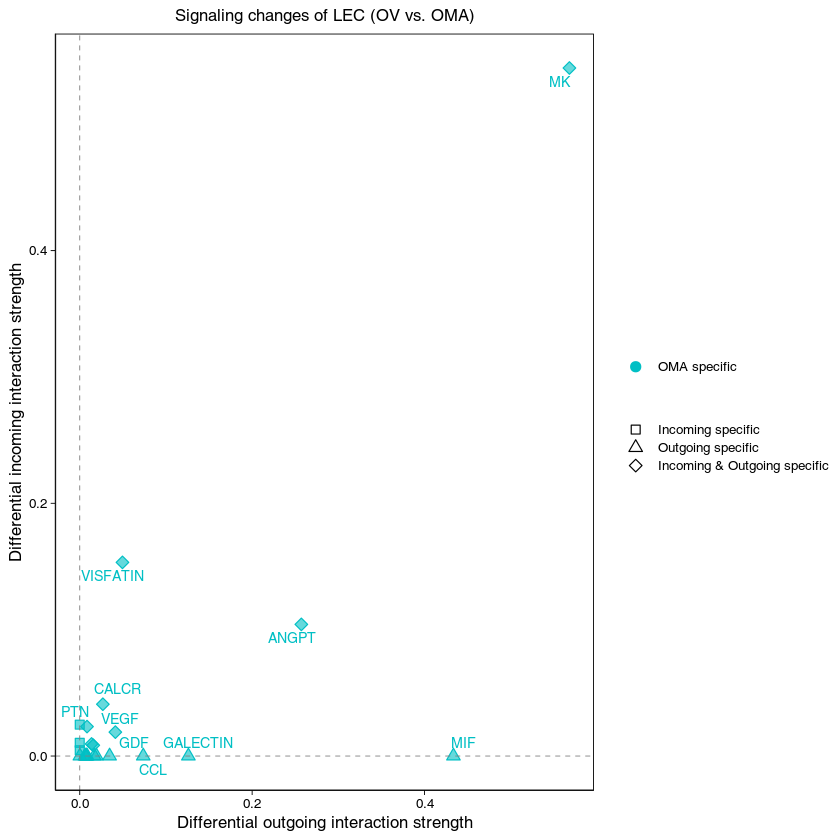

Visualizing differential outgoing and incoming signaling changes from OV to OMA

The following `from` values were not present in `x`: 0

The following `from` values were not present in `x`: 0, -1



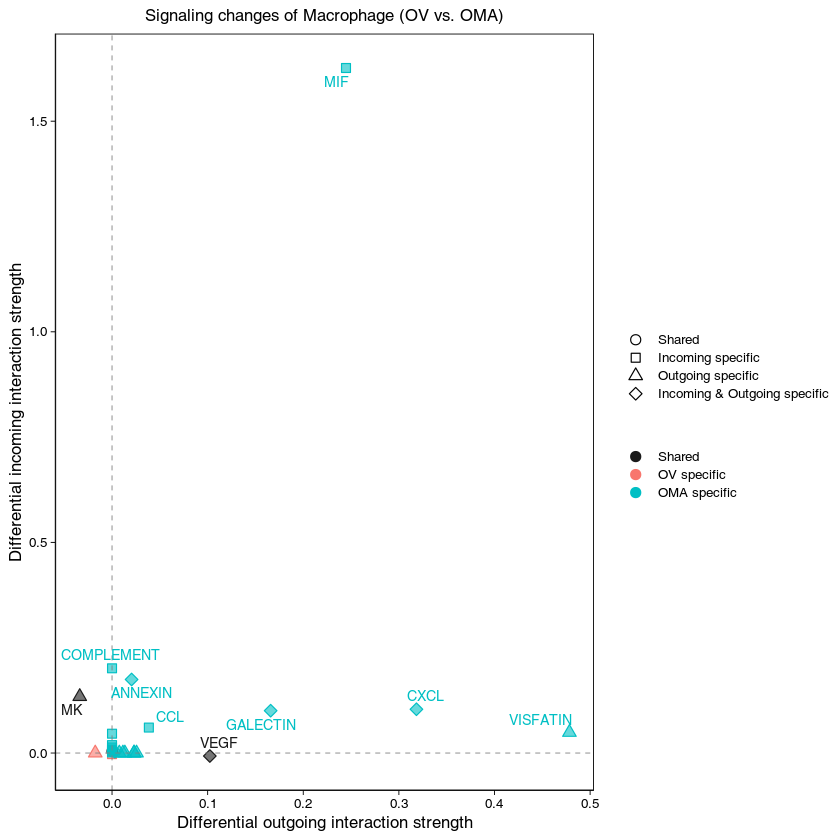

Visualizing differential outgoing and incoming signaling changes from OV to OMA



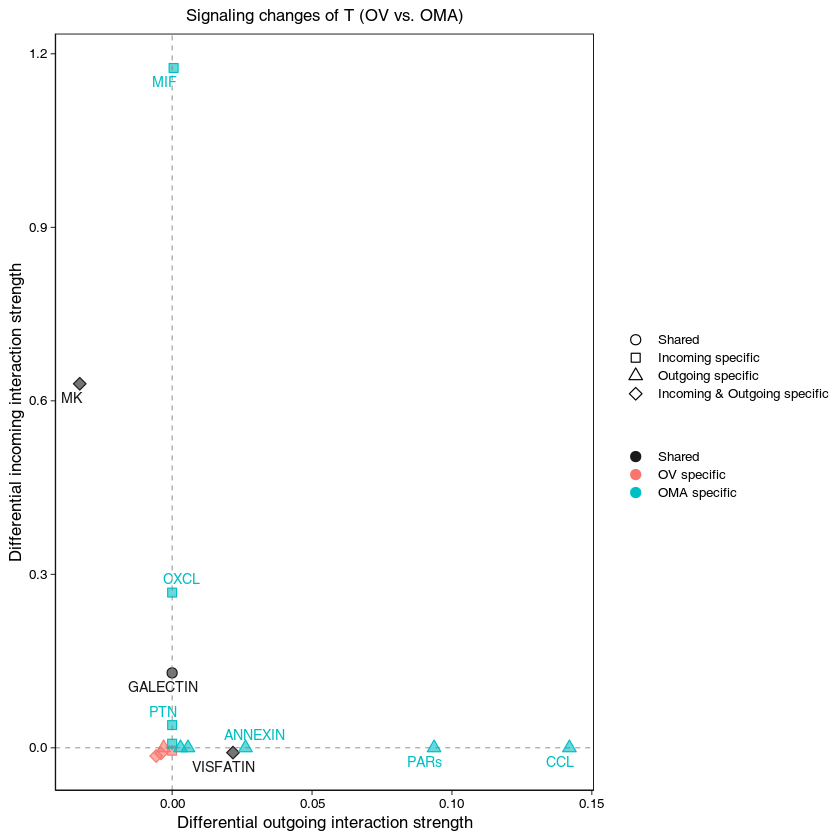

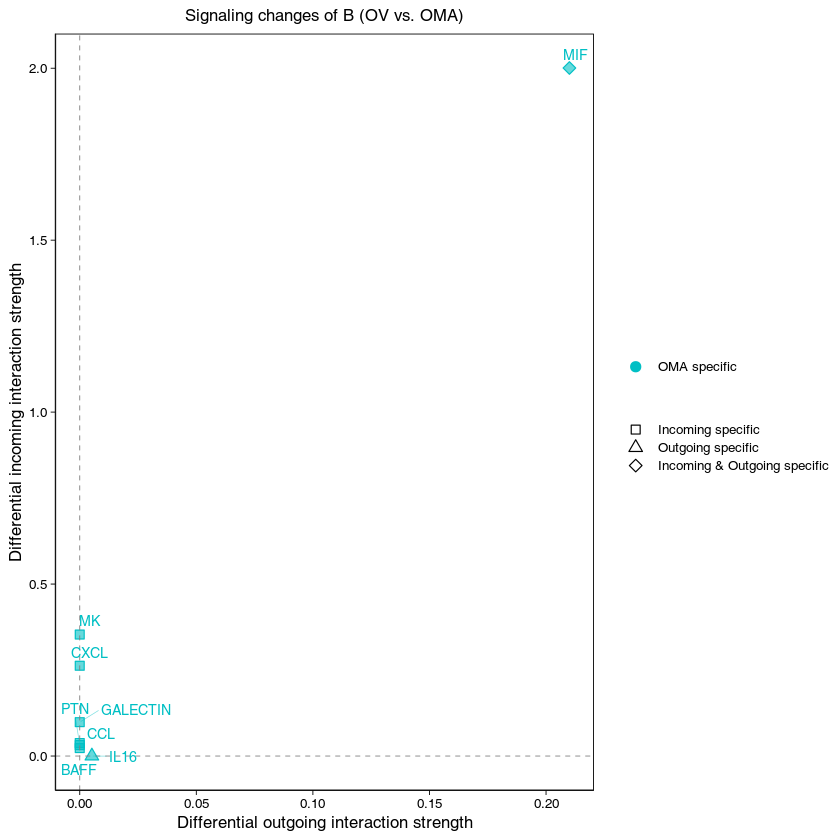

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



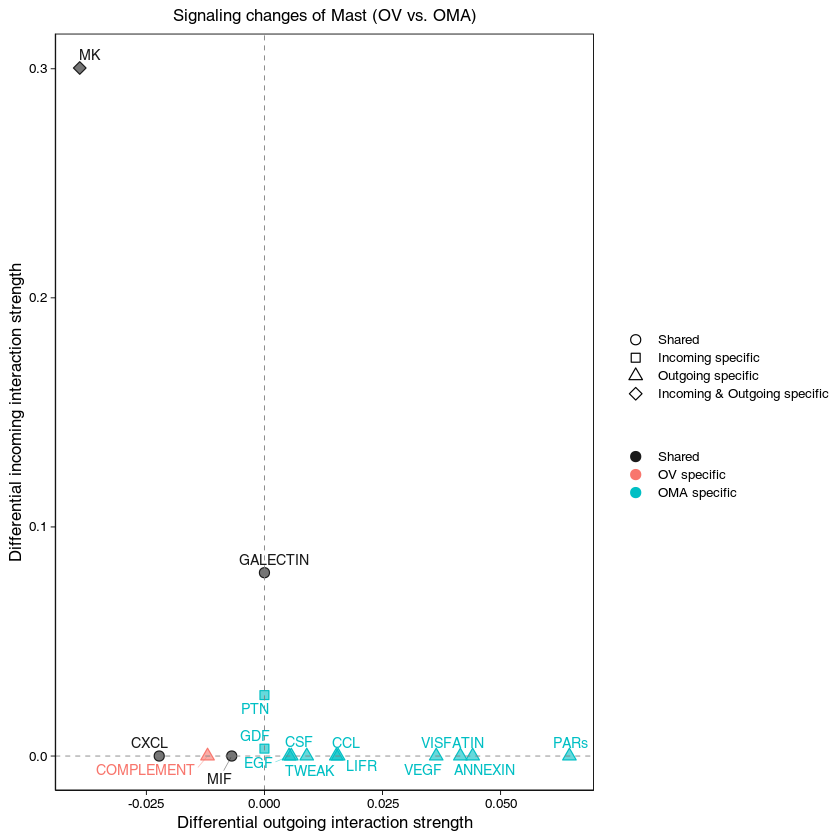

null device 
          1

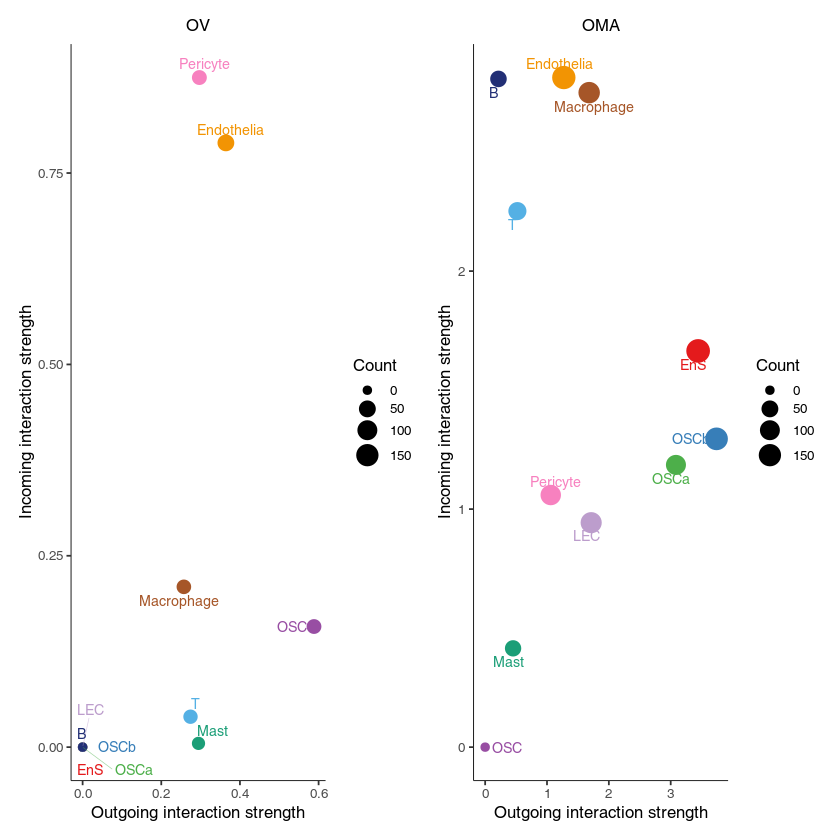

In [21]:
###plot for cellTypes dot based on each celltype
for (x in group.new) {
	tryCatch({
		p<-netAnalysis_signalingChanges_scatter(cc, idents.use = x)
		plot(p)
		},
		error = function(e) {print(str_glue("{x} error"))})
}

num.link <- sapply(cc_list, function(x) {rowSums(x@net$count) + colSums(x@net$count) - diag(x@net$count)})
weight.MinMax <- c(min(num.link), max(num.link)) # control the dot size in the different datasets
pl <- purrr::map(seq(length(cc_list)), ~ netAnalysis_signalingRole_scatter(cc_list[[.x]], title = names(cc_list)[.x], weight.MinMax = weight.MinMax))
patchwork::wrap_plots(plots = pl)


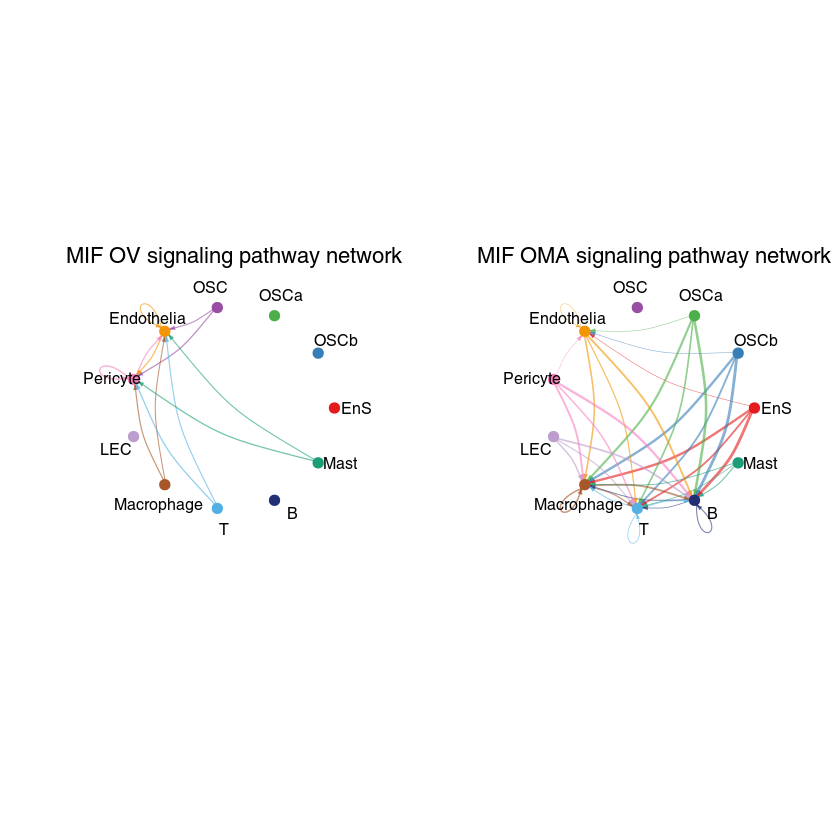

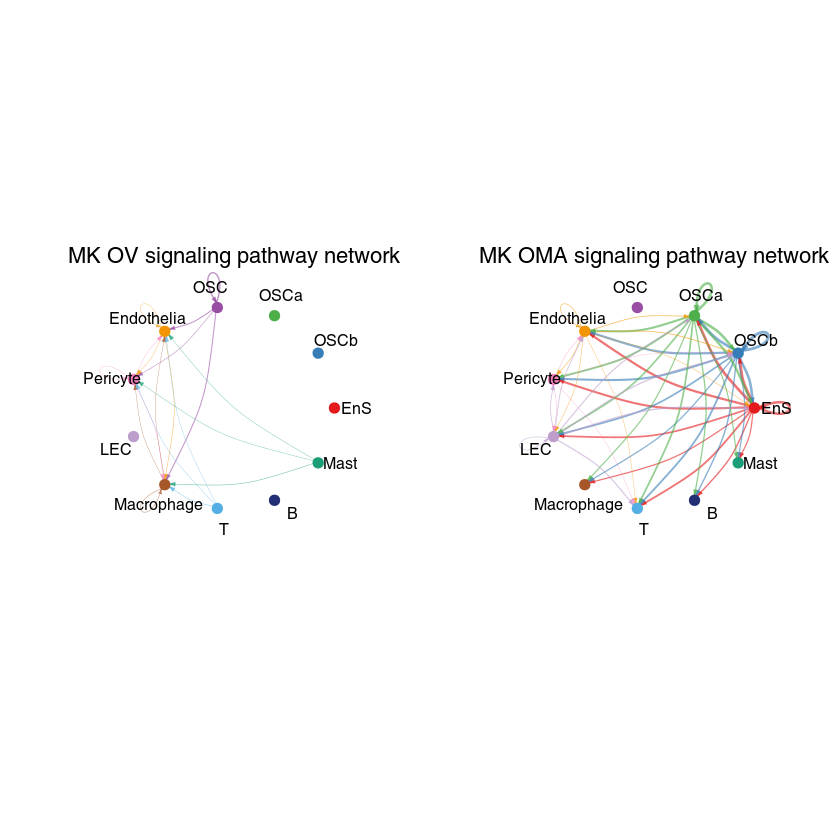

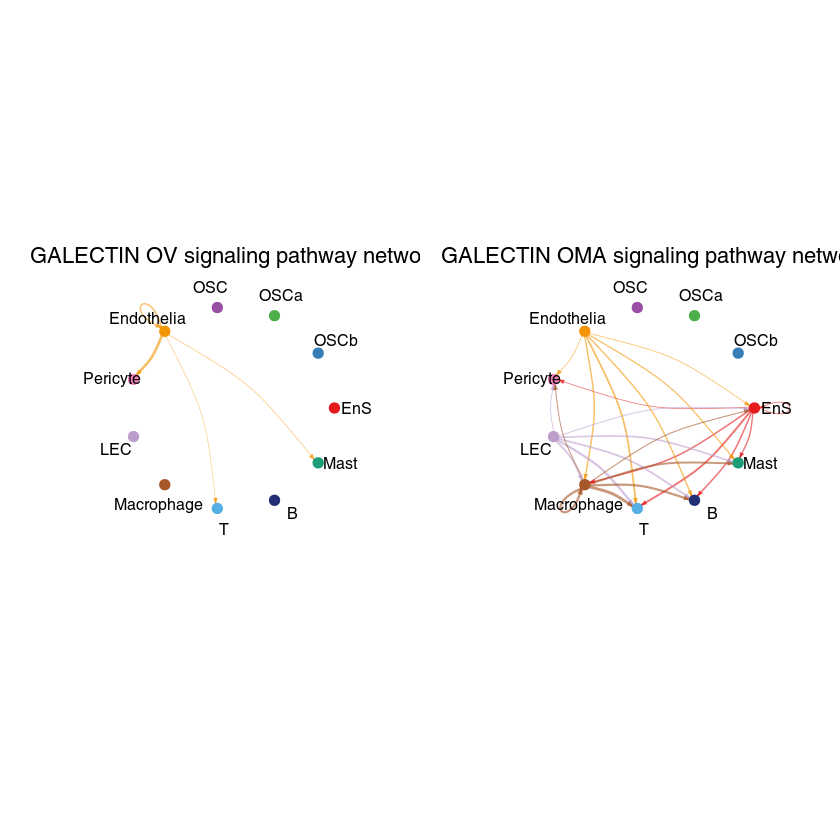

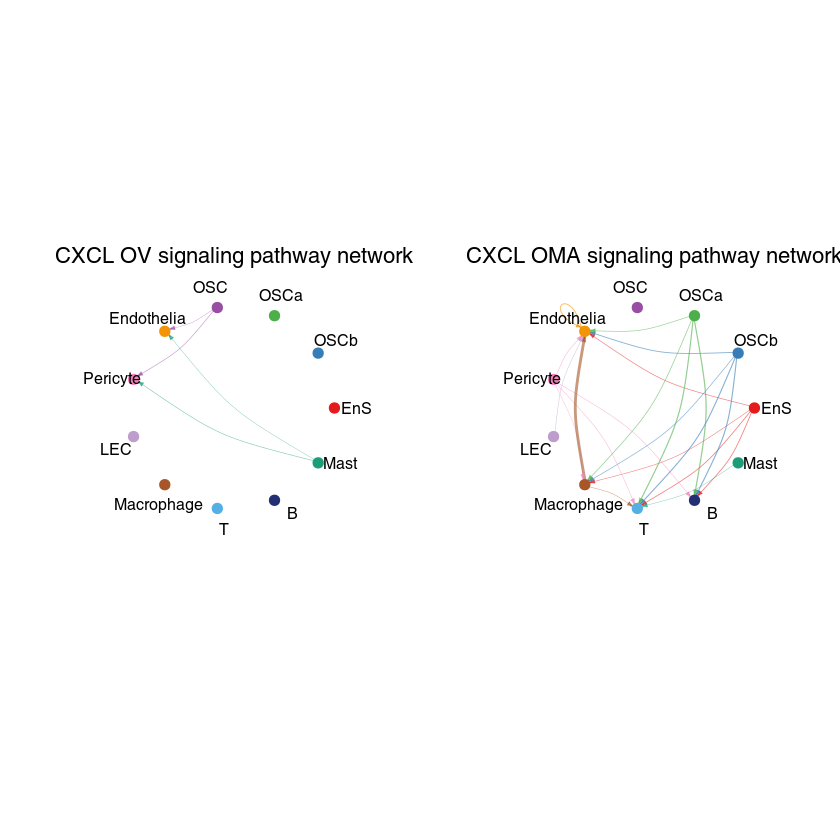

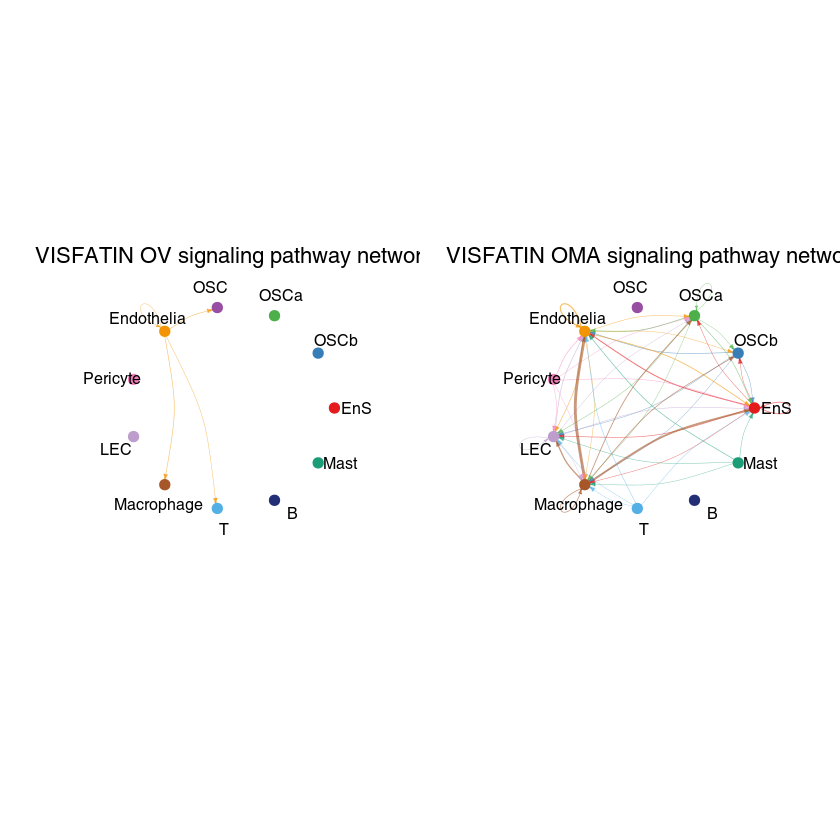

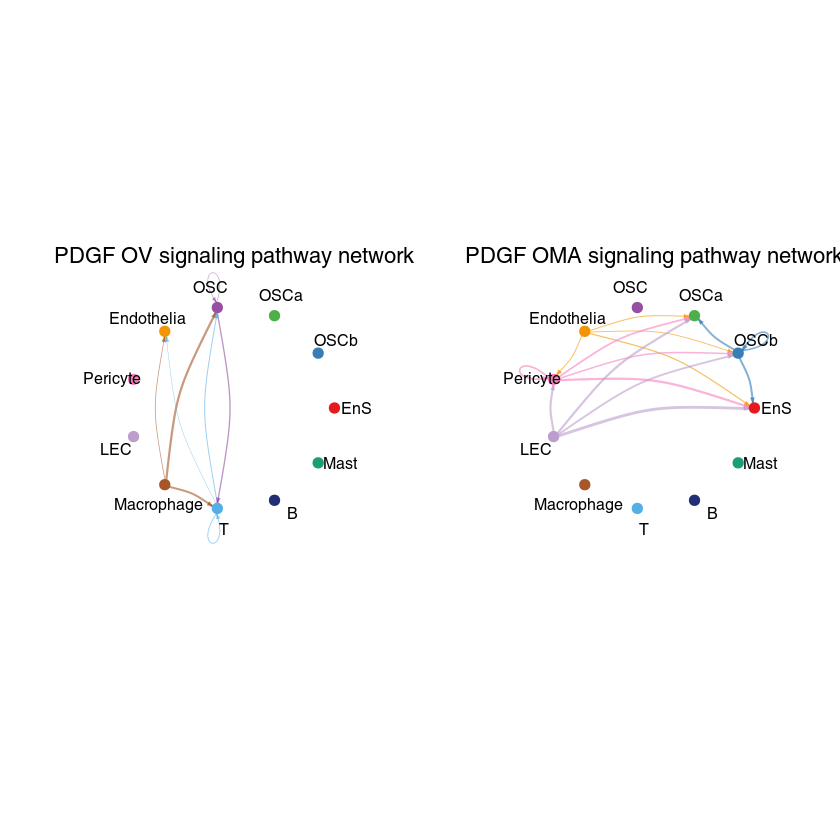

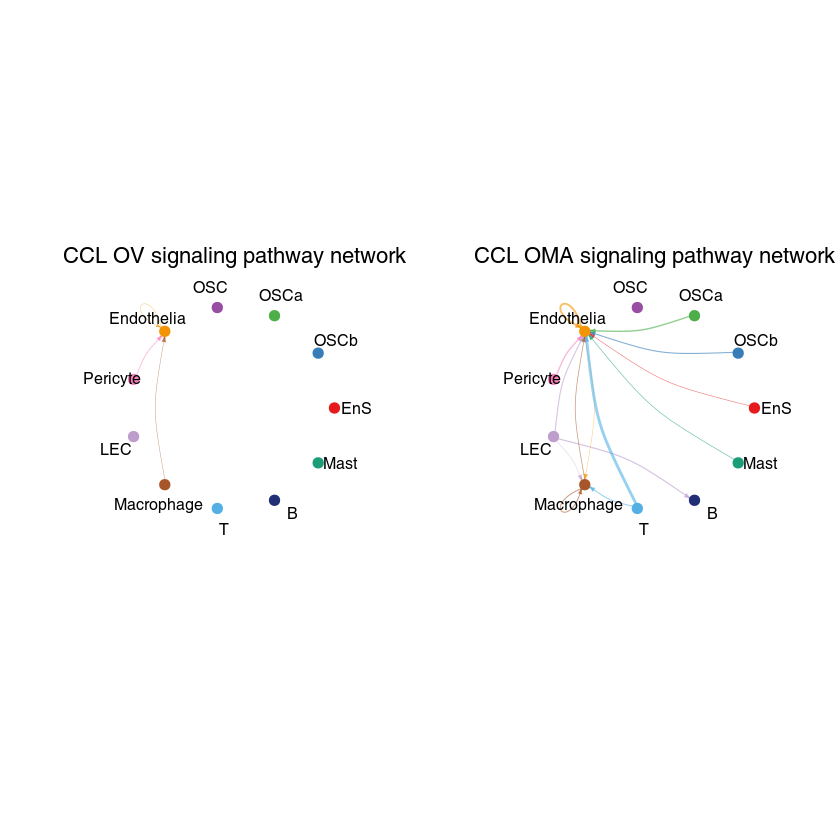

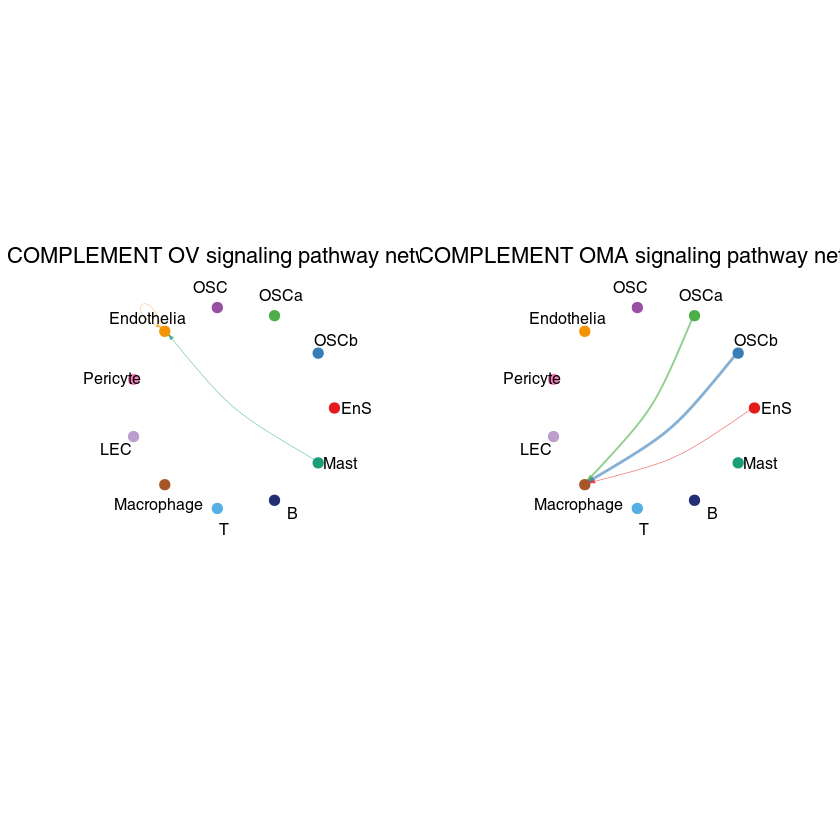

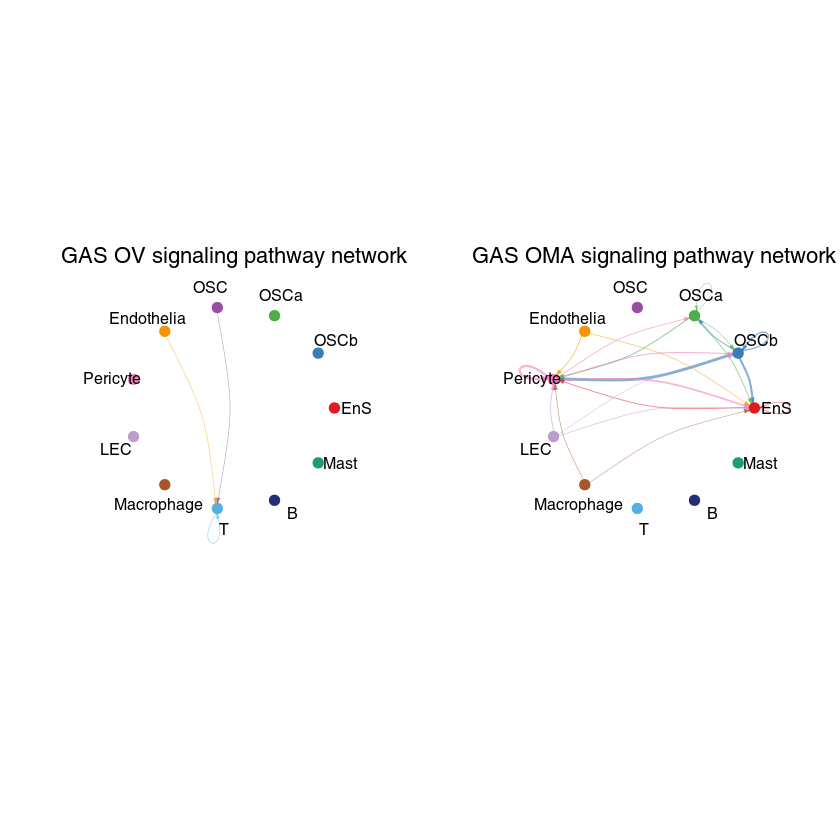

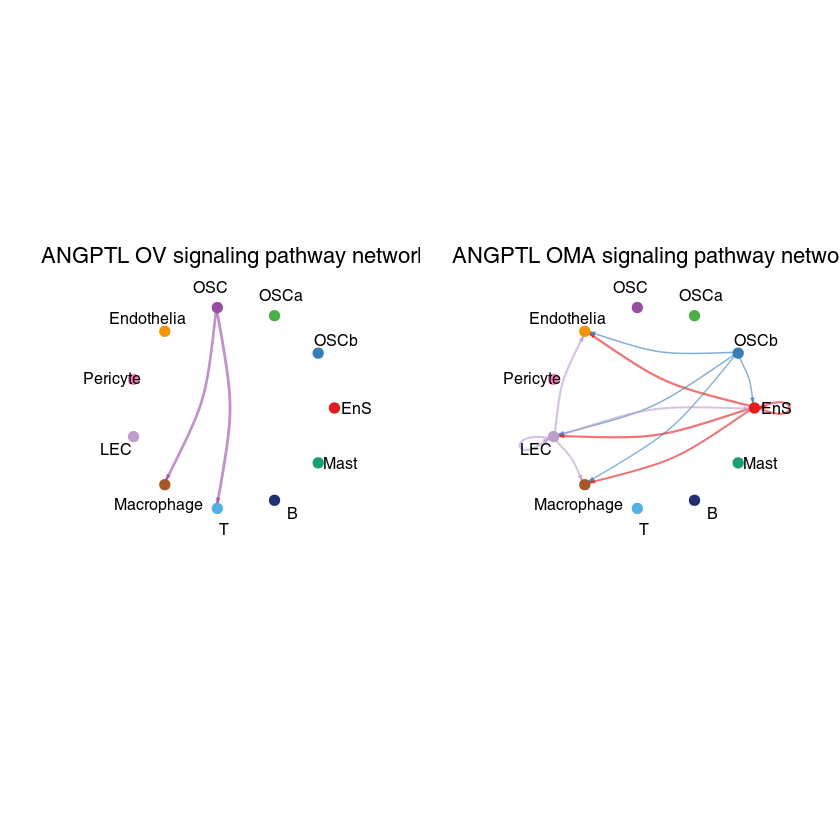

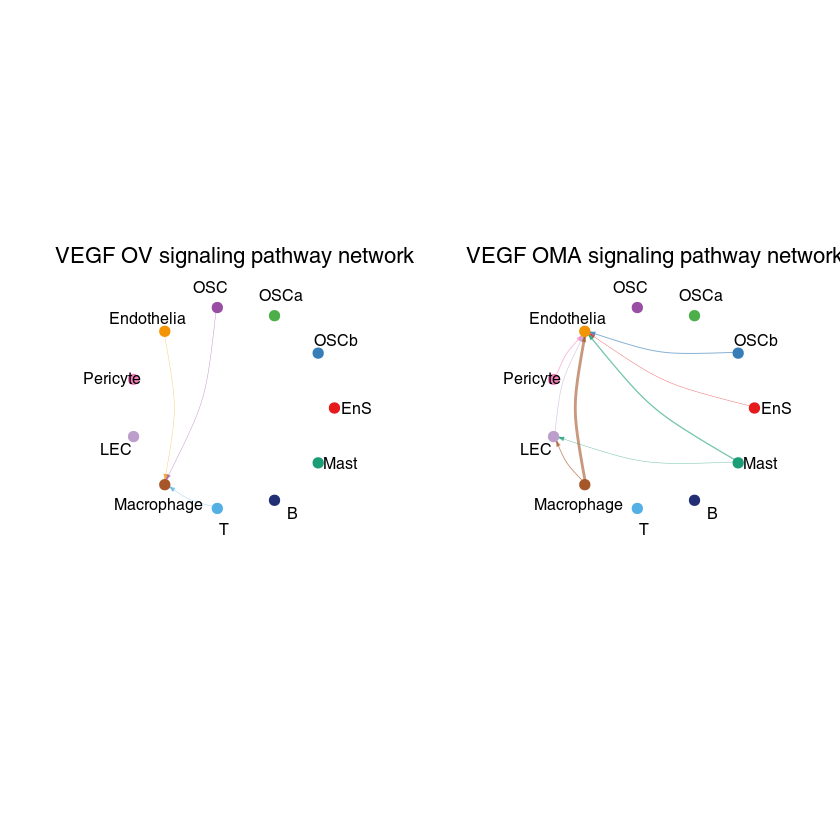

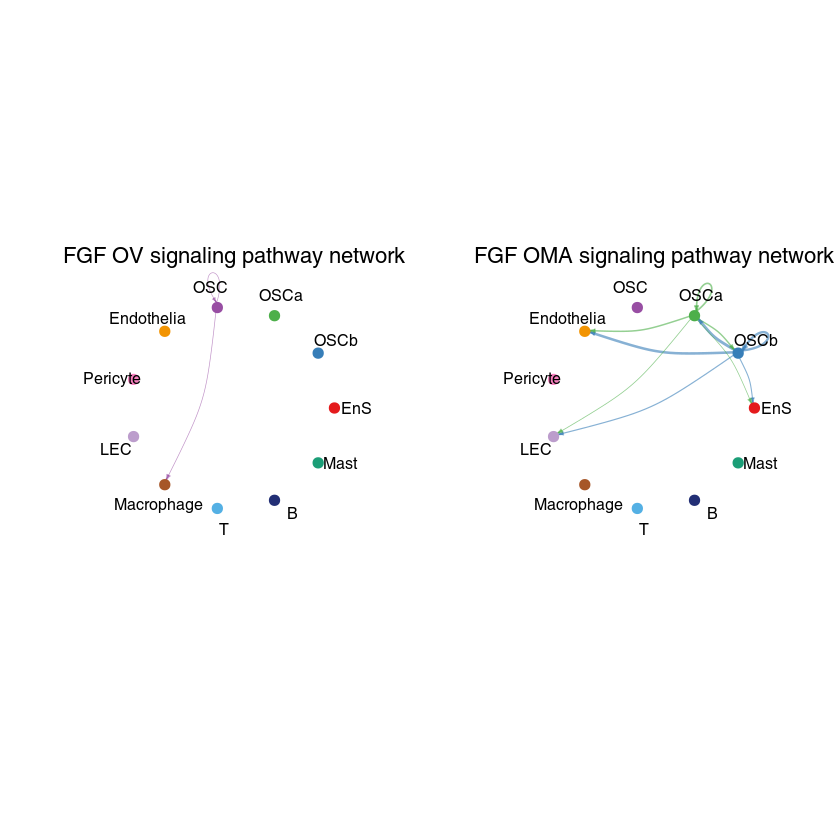

In [20]:
for (x in com_pathways) {
	weight.max <- getMaxWeight(cc_list, slot.name = c("netP"), attribute = x)
	par(mfrow = c(1, 2), xpd = TRUE)
	for (y in seq(length(cc_list))) {
		netVisual_aggregate(cc_list[[y]],signaling = x,layout = "circle",edge.weight.max = weight.max[1],edge.width.max = 2,signaling.name = paste(x, group_names[y]))
	}
}